In [1]:
import pathlib
import datetime

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
sns.set_style("whitegrid")

In [3]:
data_folder = pathlib.Path("./fixtures").joinpath("data")

In [4]:
def get_date(date_str):
    return datetime.datetime.strptime(date_str, "%Y-%m-%d").date()

In [5]:
# products dataset
products_df = pd.read_csv(data_folder.joinpath("products.csv"))
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 877 entries, 0 to 876
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           877 non-null    int64 
 1   description  877 non-null    object
dtypes: int64(1), object(1)
memory usage: 13.8+ KB


In [6]:
orders_df = pd.read_csv(data_folder.joinpath("orders.csv"))
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438 entries, 0 to 437
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           438 non-null    int64 
 1   created_at   438 non-null    object
 2   vendor_id    438 non-null    int64 
 3   customer_id  438 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 13.8+ KB


In [7]:
order_items_df = pd.read_csv(data_folder.joinpath("order_lines.csv"))
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5539 entries, 0 to 5538
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   order_id             5539 non-null   int64  
 1   product_id           5539 non-null   int64  
 2   product_description  5539 non-null   object 
 3   product_price        5539 non-null   int64  
 4   product_vat_rate     5539 non-null   float64
 5   discount_rate        5539 non-null   float64
 6   quantity             5539 non-null   int64  
 7   full_price_amount    5539 non-null   int64  
 8   discounted_amount    5539 non-null   float64
 9   vat_amount           5539 non-null   float64
 10  total_amount         5539 non-null   float64
dtypes: float64(5), int64(5), object(1)
memory usage: 476.1+ KB


In [8]:
# groupby by day
merged_order_and_item = order_items_df.merge(
    orders_df, left_on="order_id", right_on="id")
merged_order_and_item.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5539 entries, 0 to 5538
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   order_id             5539 non-null   int64  
 1   product_id           5539 non-null   int64  
 2   product_description  5539 non-null   object 
 3   product_price        5539 non-null   int64  
 4   product_vat_rate     5539 non-null   float64
 5   discount_rate        5539 non-null   float64
 6   quantity             5539 non-null   int64  
 7   full_price_amount    5539 non-null   int64  
 8   discounted_amount    5539 non-null   float64
 9   vat_amount           5539 non-null   float64
 10  total_amount         5539 non-null   float64
 11  id                   5539 non-null   int64  
 12  created_at           5539 non-null   object 
 13  vendor_id            5539 non-null   int64  
 14  customer_id          5539 non-null   int64  
dtypes: float64(5), int64(8), object(2)
mem

In [9]:
merged_order_and_item.head(20)

,order_id,product_id,product_description,product_price,product_vat_rate,discount_rate,quantity,full_price_amount,discounted_amount,vat_amount,total_amount,id,created_at,vendor_id,customer_id
0,2,794,IBM 032,21873,0.11,0.000000,49,1071777,1.071777e+06,117895.470000,1.189672e+06,2,2019-08-01 18:43:57.052767,3,1398
1,2,780,IBM 003,94046,0.20,0.761293,29,2727334,6.510325e+05,130206.500079,7.812390e+05,2,2019-08-01 18:43:57.052767,3,1398
2,2,521,Deskjet 995c / 995ck,47082,0.11,0.000000,20,941640,9.416400e+05,103580.400000,1.045220e+06,2,2019-08-01 18:43:57.052767,3,1398
3,2,835,A388C (Accompli 388),55162,0.00,0.000000,50,2758100,2.758100e+06,0.000000,2.758100e+06,2,2019-08-01 18:43:57.052767,3,1398
4,2,580,Officejet 330,15927,0.11,0.000000,46,732642,7.326420e+05,80590.620000,8.132326e+05,2,2019-08-01 18:43:57.052767,3,1398
5,2,365,QM3,33152,0.20,0.000000,11,364672,3.646720e+05,72934.400000,4.376064e+05,2,2019-08-01 18:43:57.052767,3,1398
6,2,417,GS8,96066,0.11,0.000000,22,2113452,2.113452e+06,232479.720000,2.345932e+06,2,2019-08-01 18:43:57.052767,3,1398
7,2,462,Deskjet 610c / 610cl,1037,0.20,0.522203,33,34221,1.635069e+04,3270.137627,1.962083e+04,2,2019-08-01 18:43:57.052767,3,1398
8,2,589,Officejet 720,98827,0.00,0.042481,30,2964810,2.838862e+06,0.000000,2.838862e+06,2,2019-08-01 18:43:57.052767,3,1398
9,2,428,XC60,76782,0.00,0.000000,30,2303460,2.303460e+06,0.000000,2.303460e+06,2,2019-08-01 18:43:57.052767,3,1398


## The total number of items sold on that day

In [10]:
# number of item sold by day
merged_order_and_item["created_at"] = pd.to_datetime(merged_order_and_item['created_at'], utc=True)
merged_order_and_item['date'] = merged_order_and_item['created_at'].dt.date
sale_day = merged_order_and_item.groupby("date")["quantity"].sum()
sale_day

date
2019-08-01    2895
2019-08-02    3082
2019-08-03    3559
2019-08-04    3582
2019-08-05    2768
2019-08-06    3431
2019-08-07    2767
2019-08-08    2643
2019-08-09    1506
2019-08-10    1443
2019-08-11    2466
2019-08-12    3482
2019-08-13    1940
2019-08-14    1921
2019-08-15    3479
2019-08-16    3053
2019-08-17    2519
2019-08-18    2865
2019-08-19    1735
2019-08-20    1250
2019-08-21    2351
2019-08-22    1366
2019-08-23    1817
2019-08-24    1992
2019-08-25    1424
2019-08-26    2059
2019-08-27    2723
2019-08-28    2485
2019-08-29    1947
2019-08-30    2460
2019-08-31    1902
2019-09-01    2699
2019-09-02    2597
2019-09-03    2970
2019-09-04    3880
2019-09-05    1901
2019-09-06    2563
2019-09-07    1737
2019-09-08    2129
2019-09-09    2548
2019-09-10    2040
2019-09-11    2634
2019-09-12    2957
2019-09-13    1569
2019-09-14    1783
2019-09-15    1595
2019-09-16    1599
2019-09-17    1949
2019-09-18    1756
2019-09-19    1884
2019-09-20    2292
2019-09-21    3263
2019-09

In [11]:
# Value for a date
# 2019-09-06
res = sale_day[get_date("2019-08-02")]
res

3082

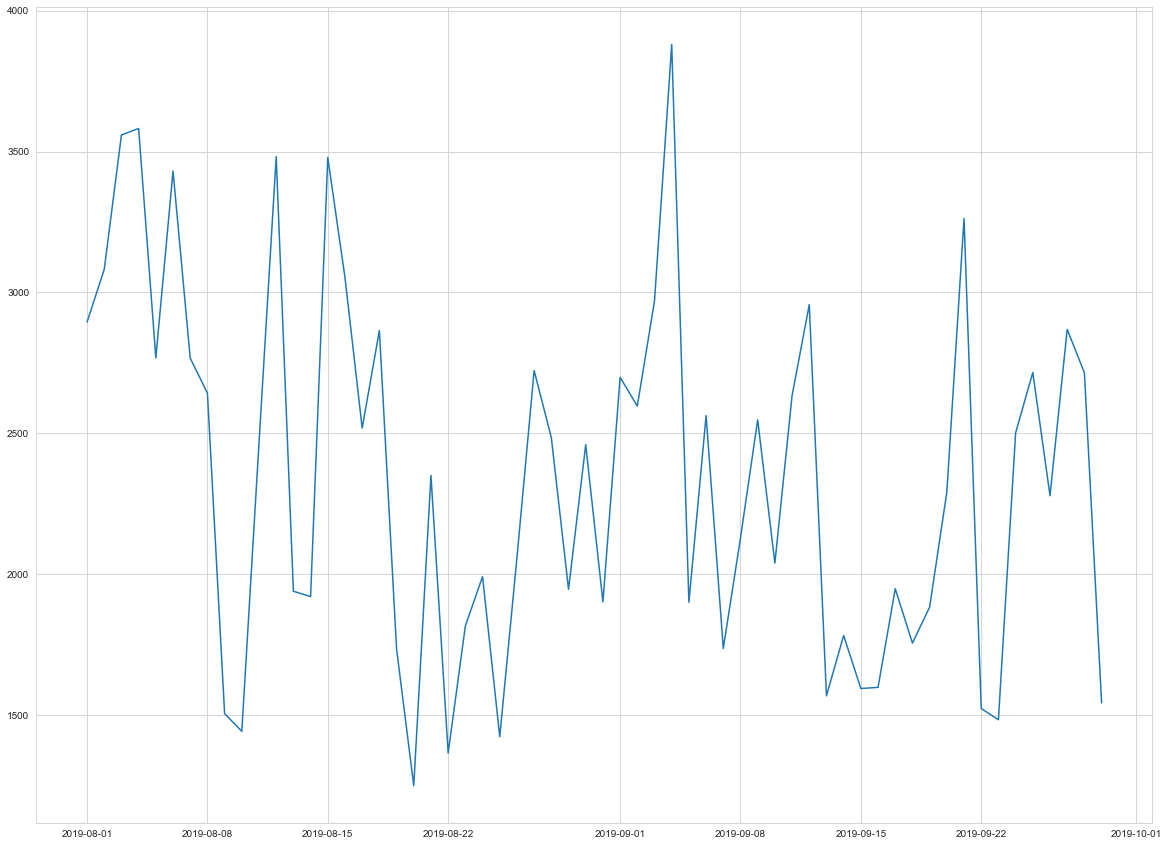

In [12]:
plt.figure(figsize=(20,15))
ax = sns.lineplot(data=sale_day)

## The total number of customers that made an order that day

In [13]:
# Unique customer per day
# list of unique customer_id per day
customers_day_list = merged_order_and_item.groupby("date")["customer_id"].unique()
customers_day_list

date
2019-08-01    [1398, 7449, 7082, 5727, 5281, 9636, 5080, 387...
2019-08-02    [5405, 4212, 4478, 3250, 4014, 408, 9593, 5456...
2019-08-03    [570, 5153, 7902, 6513, 1068, 9656, 8332, 6920...
2019-08-04    [9720, 5224, 8259, 1968, 1284, 6409, 7936, 533...
2019-08-05    [2876, 1549, 9586, 6215, 1843, 7540, 5583, 983...
2019-08-06    [7383, 7479, 8485, 4562, 2024, 5662, 6840, 548...
2019-08-07    [6692, 3666, 7434, 8675, 5717, 8220, 5268, 474...
2019-08-08     [3189, 6350, 9626, 4525, 1278, 4087, 1592, 4914]
2019-08-09                       [1035, 6124, 8790, 4313, 2958]
2019-08-10                       [8825, 4075, 1134, 4030, 5097]
2019-08-11    [6168, 6725, 3502, 5608, 5898, 4904, 5792, 326...
2019-08-12    [7308, 2417, 2870, 58, 94, 9380, 4076, 9915, 7...
2019-08-13                  [3136, 615, 2217, 6217, 4172, 9543]
2019-08-14           [4480, 2829, 6319, 5391, 7249, 2775, 5203]
2019-08-15    [9757, 1081, 184, 4800, 2341, 2303, 2871, 53, ...
2019-08-16     [8032, 8582, 4106, 5

In [14]:
customers_day_list[get_date("2019-08-02")]

array([5405, 4212, 4478, 3250, 4014,  408, 9593, 5456, 4742, 8310])

In [15]:
customers_day_count = pd.Series(
    index=customers_day_list.index, 
    data=[len(v) for v in customers_day_list.values])


Text(0.5, 1.0, 'Unique Customer per day')

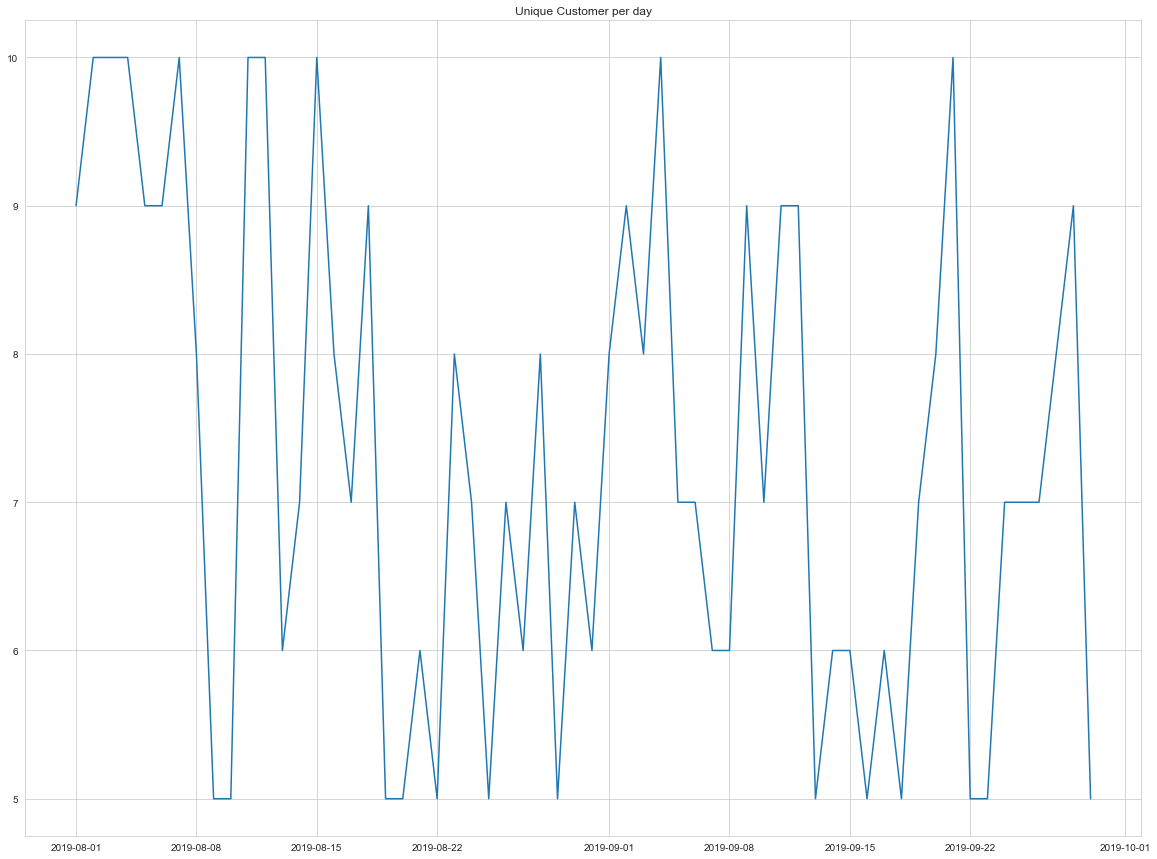

In [16]:
plt.figure(figsize=(20,15))
ax_customer_unique = sns.lineplot(data=customers_day_count)
ax_customer_unique.set_title('Unique Customer per day')

In [17]:
print("Value for the 2019-08-02 ", customers_day_count[get_date("2019-08-02")])

Value for the 2019-08-02  10


## The total amount of discount given that day (using discounted_amount column)

Text(0.5, 1.0, 'Discounted amount per day')

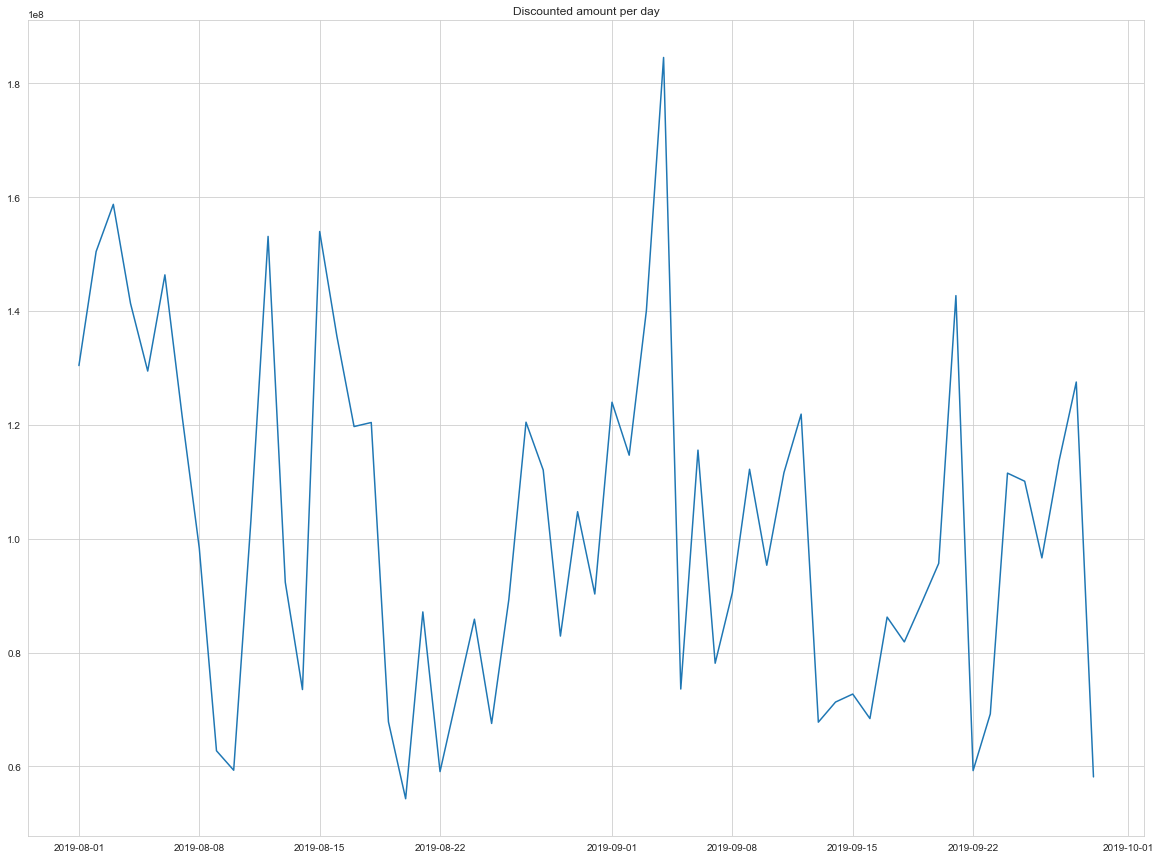

In [18]:
plt.figure(figsize=(20,15))
discounted_day = merged_order_and_item.groupby("date")["discounted_amount"].sum()
ax_discount_amount = sns.lineplot(data=discounted_day)
ax_discount_amount.set_title('Discounted amount per day')

In [19]:
print("Value for the 2019-08-02 ", discounted_day[get_date("2019-08-02")])

Value for the 2019-08-02  150457385.3559189


As we can see 
![First line](./doc/first_line.png)
The discounted amount for a rate value of 0 must be equal to 0!

## The total amount of discount given that day (using discounted_rate column)

In [55]:
merged_order_and_item["discounted_amount2"] = merged_order_and_item["discount_rate"] * merged_order_and_item["total_amount"]
computed_discounted_day = merged_order_and_item.groupby("date")["discounted_amount2"].sum()
computed_total_amount = merged_order_and_item.groupby("date")["total_amount"].sum()

Text(0.5, 1.0, 'Discounted amount (computed) per day')

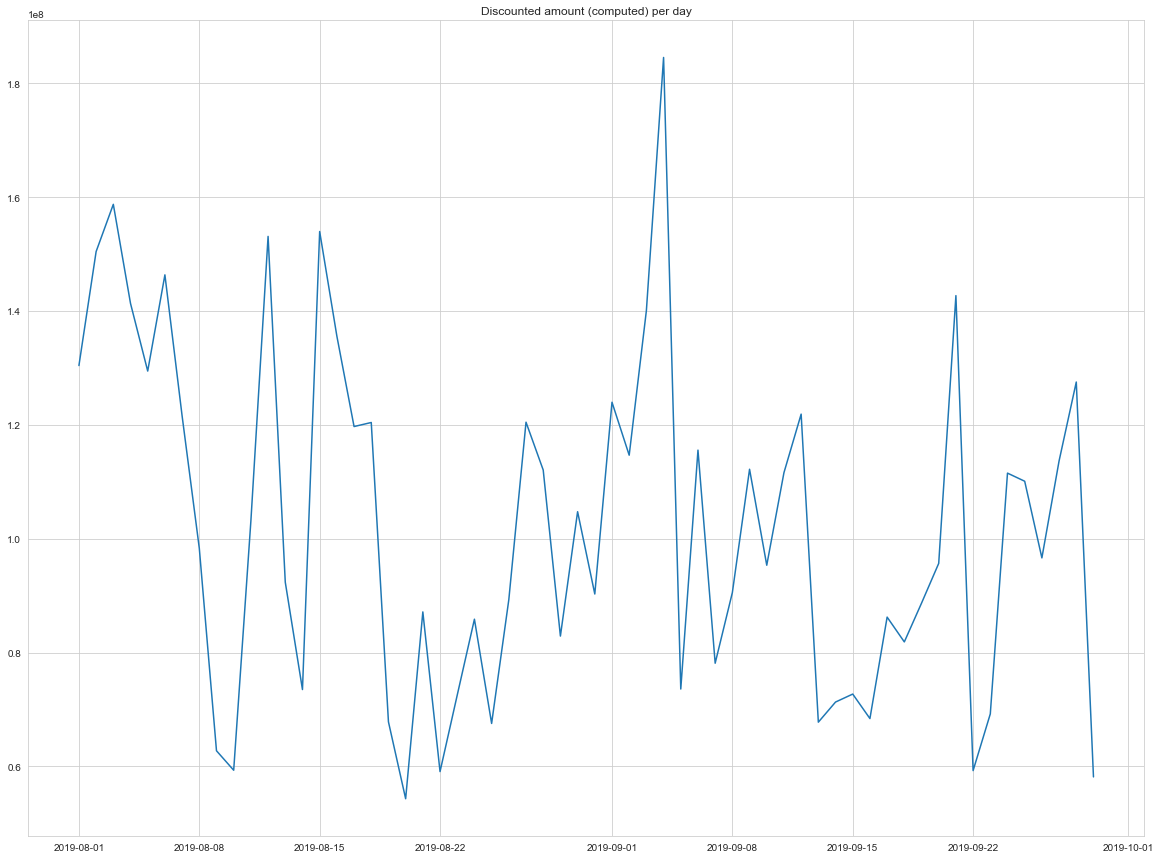

In [54]:
plt.figure(figsize=(20,15))
ax_discount_amount = sns.lineplot(data=discounted_day)
ax_discount_amount.set_title('Discounted amount (computed) per day')

In [60]:

print("Value for the 2019-08-02 of total amount", computed_total_amount[get_date("2019-08-02")])
print("Value for the 2019-08-02 of discounted amount", computed_discounted_day[get_date("2019-08-02")])

print("Value for the 2019-08-02 of % of discount", 
      computed_discounted_day[get_date("2019-08-02")]/computed_total_amount[get_date("2019-08-02")]*100)

Value for the 2019-08-02 of total amount 164998295.76384336
Value for the 2019-08-02 of discounted amount 6824393.93254173
Value for the 2019-08-02 of % of discount 4.136039042675484


## The average discount rate applied to the items sold that day

Text(0.5, 1.0, 'Average discount amount per day')

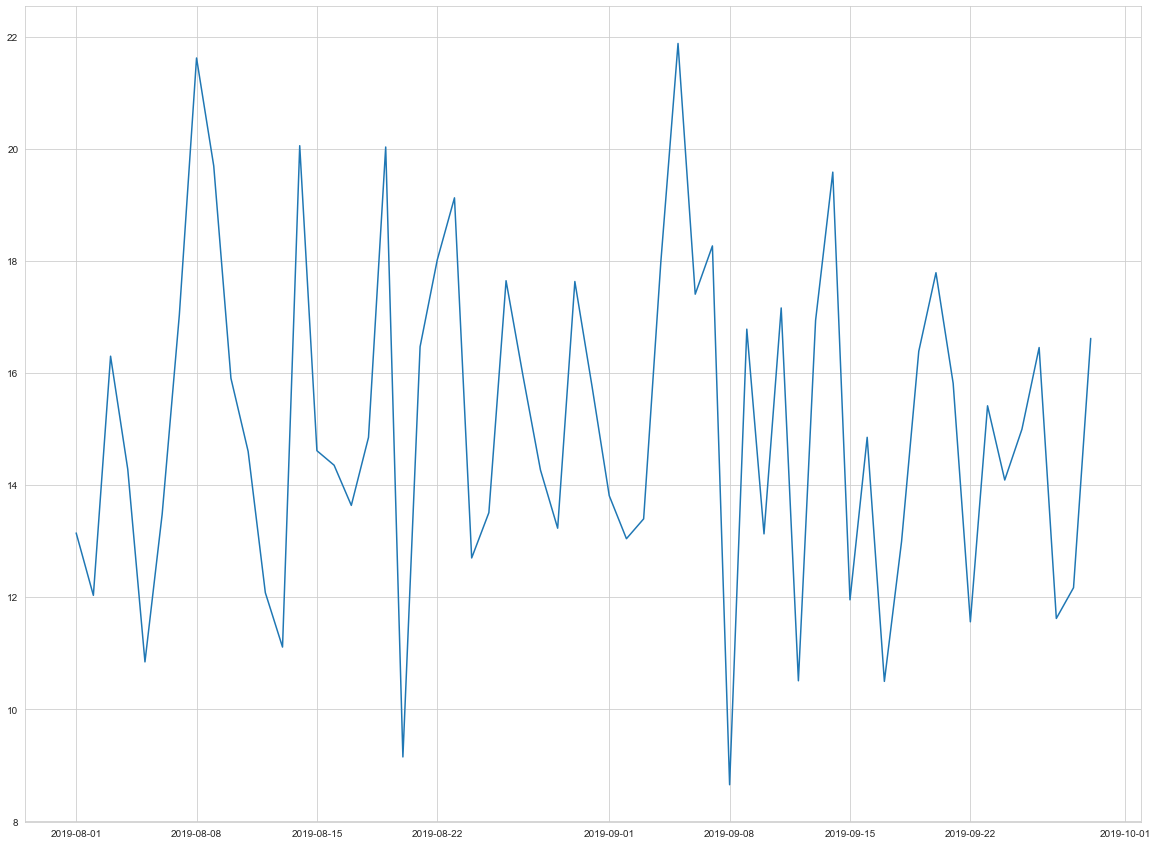

In [22]:
plt.figure(figsize=(20,15))
rate_per_day = merged_order_and_item.groupby("date")["discount_rate"]
quantity_per_day = merged_order_and_item.groupby("date")["quantity"]
sum_per_day =  merged_order_and_item.groupby("date")["quantity"].sum()

merged_order_and_item["weighted_discount_rate"] = merged_order_and_item["discount_rate"] * merged_order_and_item["quantity"] * 100

average_discount_per_day = merged_order_and_item.groupby("date")["weighted_discount_rate"].sum()/sum_per_day 
ax_average_discount = sns.lineplot(data=average_discount_per_day)
ax.set_title('Average discount amount per day')

In [24]:
print("Value for the 2019-08-02 ", average_discount_per_day[get_date("2019-08-02")])

Value for the 2019-08-02  12.032583559680823


## The average order total for that day

In [48]:
plt.figure(figsize=(20,15))
avg_order_total = merged_order_and_item.groupby(["date", "order_id"])["total_amount"].sum()
avg_order_total

date        order_id
2019-08-01  2           2.104800e+07
            3           1.071703e+07
            4           1.095133e+07
            5           1.490744e+07
            6           1.729744e+07
                            ...     
2019-09-29  435         1.021022e+07
            436         1.291581e+07
            437         9.974060e+06
            438         1.500203e+07
            439         1.447381e+07
Name: total_amount, Length: 438, dtype: float64

<Figure size 1440x1080 with 0 Axes>

In [43]:
print("Value for the 2019-08-02 ", avg_order_total[get_date("2019-08-02")].mean())


Value for the 2019-08-02  16499829.576384341


In [ ]:
#ax = sns.lineplot(data=avg_order_total)
#ax.set_title('Average total per day')

## The average order total for that day (computed)

In [51]:

# vat incl
merged_order_and_item["full_price_amount2"] = merged_order_and_item["product_price"] * merged_order_and_item["quantity"] * (1 + merged_order_and_item["product_vat_rate"])
# discount
merged_order_and_item["total_amount2"] = merged_order_and_item["full_price_amount2"] * (1 - merged_order_and_item["discount_rate"])
computed_avg_order_total = merged_order_and_item.groupby(["date", "order_id"])["total_amount2"].sum()



In [52]:
print("Value for the 2019-08-02 ", computed_avg_order_total[get_date("2019-08-02")].mean())

Value for the 2019-08-02  16499829.576384341


In [ ]:
plt.figure(figsize=(20,15))
ax = sns.lineplot(data=computed_avg_order_total)
ax.set_title('Average total (computed) per day')


In [33]:
print("Value for the 2019-08-02 ", computed_avg_order_total[get_date("2019-08-02")])

Value for the 2019-08-02  6707985.327199999
